In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column
import sympy as sym

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [2]:
# konstante 
ε_0 = 8.854e-12
g = 9.80665
R = unp.uarray([5e9], [0.1e9])
S = unp.uarray([np.pi * (38e-3 / 2) ** 2], [np.pi * 2 * (38e-3 / 2) * 0.2e-3 / 2])
b = unp.uarray([6.5e-3], [0.2e-3])
m_1, m_2, m_3, dm = 196e-3, 503e-3, 1007e-3, 1e-3

S * 1e4

array([11.341149479459153+/-0.11938052083641214], dtype=object)

In [39]:
def theta(t, t_0):
    if t.all() >= t_0:
        return 1
    else:
        return 0


def theoreticalfit(t, u_b, u_0, t_0, tau, s=1):
    return u_b + s * u_0 * np.exp(-(t - t_0) / tau) * np.heaviside(t-t_0, 1)

def U_ansatz(t, U_0, tau):
    return U_0 * np.exp(-t/tau)

/tmp/ipykernel_16529/330290888.py:9: RuntimeWarning: overflow encountered in exp
  return u_b + s * u_0 * np.exp(-(t - t_0) / tau) * np.heaviside(t-t_0, 1)
/tmp/ipykernel_16529/330290888.py:9: RuntimeWarning: invalid value encountered in multiply
  return u_b + s * u_0 * np.exp(-(t - t_0) / tau) * np.heaviside(t-t_0, 1)


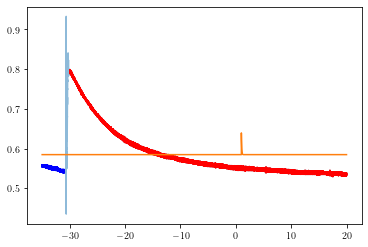

In [47]:
data = np.array(pd.read_csv(r'01P.csv'))

t, U = data[:, 0], data[:, 1]
t, U = t[t < 20], U[t < 20]

par, cov = curve_fit(theoreticalfit, xdata=t, ydata=U)

fig, ax = plt.subplots()
ax.plot(t, U, alpha=0.5)
ax.plot(t[t>-30], U[t>-30], color='r')
ax.plot(t[t<-31], U[t<-31], color='b')
ax.plot(t, theoreticalfit(t, *par))